<a href="https://colab.research.google.com/github/GDharan10/Dataset18_HRPromotionPredictiveAnalytics_Classification/blob/main/HR_Promotion_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installation**

In [ ]:
pip install lazypredict

# **Librarys**

In [ ]:
import pandas as pd
import numpy as np

#Connections
from google.colab import drive

#Statistic
from scipy import stats

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OrdinalEncoder

#Machine Learning identifying algorithms/Model
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor, LazyClassifier

#Machine Learning Training
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#Machine Learning Evaluation
from sklearn.metrics import precision_score, recall_score

# **Connections**

In [ ]:
#Google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading dataset**

In [ ]:
#Google drive
file_path = '/content/drive/My Drive/DTM15/Dataset/HR Analytics/train.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.00,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.00,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.00,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.00,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.00,2,0,0,73,0


In [ ]:
df.shape

(54808, 14)

# **DataFrame observation**


In [ ]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
for column in df.columns:
  print(column,'---',df[column].unique())
  print('---------------------------')

employee_id --- [65438 65141  7513 ... 13918 13614 51526]
---------------------------
department --- ['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
---------------------------
region --- ['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
---------------------------
education --- ["Master's & above" "Bachelor's" nan 'Below Secondary']
---------------------------
gender --- ['f' 'm']
---------------------------
recruitment_channel --- ['sourcing' 'other' 'referred']
---------------------------
no_of_trainings --- [ 1  2  3  4  7  5  6  8 10  9]
---------------------------
age --- [35

In [ ]:
# Dependent - is_promoted
# Independent -

continuous_columns = ['no_of_trainings', 'age', 'length_of_service', 'avg_training_score']
category_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel',
                    'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'is_promoted']

#Supervised Classification

In [ ]:
df['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

# **Data cleaning using pandas**


In [ ]:
df.set_index('employee_id', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54808 entries, 65438 to 51526
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   KPIs_met >80%         54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.9+ MB


In [ ]:
df.isnull().sum()

department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [ ]:
df.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [ ]:
df.education.fillna("Not Mentioned", inplace = True)
df.previous_year_rating.fillna(0, inplace = True)

In [ ]:
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# **Hypothesis testing / Statistical analysis**


In [ ]:
def hypothesisTesting(df, continuous_columns = [], category_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  df = df
  #Central Limit Theorem
  oneContinesColumn_result = {}
  hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      population=df[column].values
      population_mean = population.mean()
      sample_mean=[]
      for i in range(40):
        sample=np.random.choice(population,samplesize)
        sample_mean.append(sample.mean())
      oneContinesColumn_result[column] = {
                                          "Population Mean": population_mean,
                                          "Sample Means": {np.mean(sample_mean)}
                                          }

  #1-Tailed Test
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      H0_accepted = 0
      H0_rejected = 0
      for i in range(samplesize):
        sample=df[column].sample(frac=sampling_frac)
        t_test,p_value=stats.ttest_1samp(sample,df[column].mean())
        if p_value > 0.5:
          H0_accepted += 1
        else:
          H0_rejected += 1

      if H0_accepted > H0_rejected:
          oneContinesColumn_result[column].update( {
                                            "H0_accepted": H0_accepted,
                                            "H0_rejected": H0_rejected,
                                            "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                                          } )
          hypothesis_df[column][column] = "There is a relationship"

      else:
          oneContinesColumn_result[column].update( {
                                              "H0_accepted": H0_accepted,
                                              "H0_rejected": H0_rejected,
                                              "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                                              } )
          hypothesis_df[column][column] = "There is no relationship"


  #2-Tailed Test
  for i in range(len(continuous_columns) - 1):
      column_1 = continuous_columns[i]
      for column_2 in continuous_columns[i+1:]:
        H0_accepted = 0
        H0_rejected = 0
        for i in range(20):
          sample1 = df[column_1].sample(frac=sampling_frac)
          sample2 = df[column_2].sample(frac=sampling_frac)
          t_test, p_value = stats.ttest_ind(sample1, sample2)
          if p_value > 0.5:
            H0_accepted += 1
          else:
            H0_rejected += 1

        if H0_accepted > H0_rejected:
          #H0 is accepted, Ha is rejected, There is no significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
          hypothesis_df[column_1][column_2] = "There is a relationship"
          hypothesis_df[column_2][column_1] = "There is a relationship"
        else:
          #H0 is rejected, Ha is accepted, There is a significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
            hypothesis_df[column_1][column_2] = "There is no relationship"
            hypothesis_df[column_2][column_1] = "There is no relationship"

  #Chi-Square Test
  if category_columns:
    for i in range(len(category_columns) - 1):
        column_1 = category_columns[i]
        for column_2 in category_columns[i + 1:]:
            data = pd.crosstab(df[column_1], df[column_2])
            observed_values = data.values
            chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

            if p_value > 0.05:
                # H0 is accepted, There is no relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is no relationship"
                hypothesis_df[column_2][column_1] = "There is no relationship"
            else:
                # H0 is rejected, There is a relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is a relationship"
                hypothesis_df[column_2][column_1] = "There is a relationship"

  #ANOVA
  if continuous_columns and category_columns:
    for category_column in category_columns:
      for continuous_column in continuous_columns:
        group = df[category_column].unique()
        data = {}
        for i in group:
          data[i]=df[continuous_column][df[category_column]==i]

        f_value, p_value = stats.f_oneway(*[data[i] for i in group])
        if p_value > 0.05:
            # H0 is accepted, There is a relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is a relationship"
            hypothesis_df[continuous_column][category_column] = "There is a relationship"
        else:
            # H0 is rejected, There is no relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is no relationship"
            hypothesis_df[continuous_column][category_column] = "There is no relationship"

  return oneContinesColumn_result, hypothesis_df

# Correlation

In [ ]:
 df.corr()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
department,1.00,-0.02,0.07,-0.03,0.00,0.01,0.08,-0.10,0.06,-0.09,-0.00,-0.25,0.00
region,-0.02,1.00,-0.01,0.02,-0.00,-0.00,-0.09,-0.01,-0.06,-0.01,0.00,0.02,0.01
education,0.07,-0.01,1.00,0.01,-0.01,-0.04,0.23,0.04,0.16,-0.02,-0.00,-0.02,0.01
gender,-0.03,0.02,0.01,1.00,0.01,0.08,-0.02,-0.03,-0.02,-0.04,0.00,-0.02,-0.01
recruitment_channel,0.00,-0.00,-0.01,0.01,1.00,-0.01,-0.01,0.00,-0.00,-0.00,-0.01,-0.00,0.00
no_of_trainings,0.01,-0.00,-0.04,0.08,-0.01,1.00,-0.08,-0.06,-0.06,-0.05,-0.01,0.04,-0.02
age,0.08,-0.09,0.23,-0.02,-0.01,-0.08,1.00,0.18,0.66,-0.03,-0.01,-0.05,-0.02
previous_year_rating,-0.10,-0.01,0.04,-0.03,0.00,-0.06,0.18,1.00,0.19,0.27,0.02,0.06,0.13
length_of_service,0.06,-0.06,0.16,-0.02,-0.00,-0.06,0.66,0.19,1.00,-0.08,-0.04,-0.04,-0.01
KPIs_met >80%,-0.09,-0.01,-0.02,-0.04,-0.00,-0.05,-0.03,0.27,-0.08,1.00,0.10,0.08,0.22


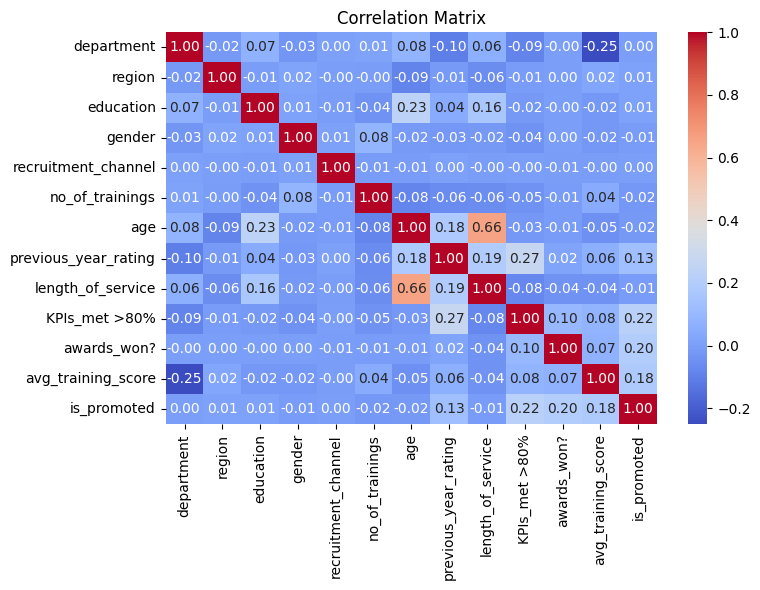

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# **Result Hypothesis**

In [ ]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(df, continuous_columns , category_columns)

In [ ]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

,no_of_trainings,age,length_of_service,avg_training_score
Population Mean,1.25,34.80,5.87,63.39
Sample Means,{1.2555446583340937},{34.80057476507618},{5.861390384089043},{63.385309278350505}
H0_accepted,5564,5619,5582,5623
H0_rejected,5397,5342,5379,5338
Conclusion,"H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si..."


In [ ]:
comperativeColumn_result

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
department,NaN,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship
region,There is a relationship,NaN,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship
education,There is a relationship,There is a relationship,NaN,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship
gender,There is a relationship,There is a relationship,There is a relationship,NaN,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship
recruitment_channel,There is a relationship,There is a relationship,There is a relationship,There is no relationship,NaN,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship
no_of_trainings,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship
age,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship
previous_year_rating,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,NaN,There is no relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship
length_of_service,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship
KPIs_met >80%,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,NaN,There is a relationship,There is no relationship,There is a relationship


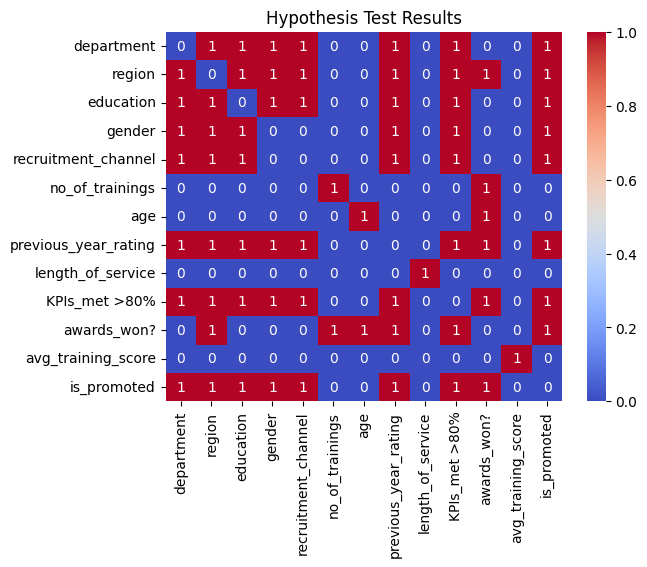

In [ ]:
# Create a heatmap
sns.heatmap(comperativeColumn_result == 'There is a relationship', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

# **Data Visualization**

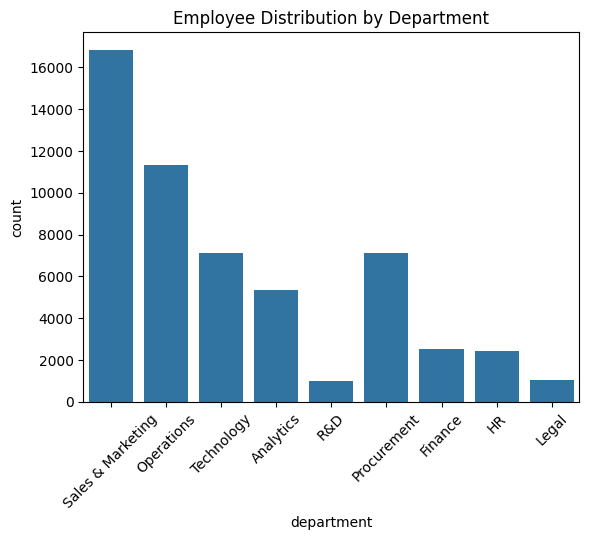

In [ ]:
sns.countplot(x='department', data=df)
plt.xticks(rotation=45)
plt.title('Employee Distribution by Department')
plt.show()

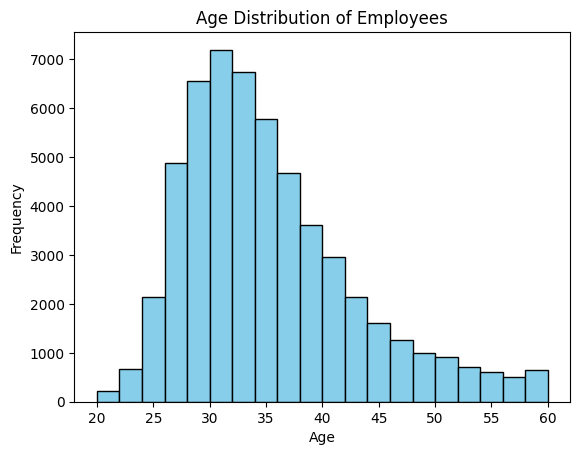

In [ ]:
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Employees')
plt.show()

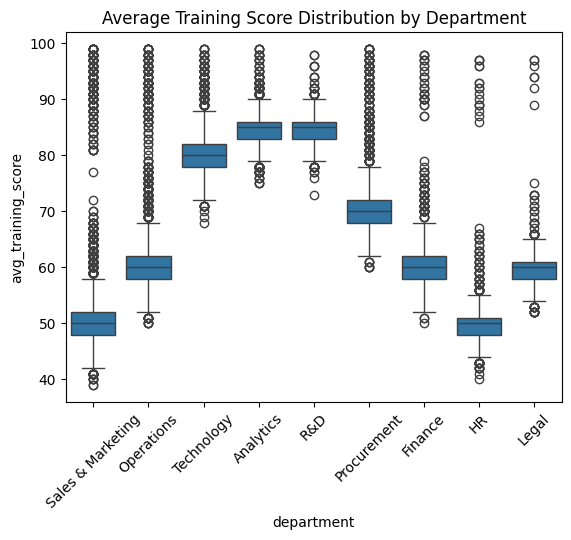

In [ ]:
sns.boxplot(x='department', y='avg_training_score', data=df)
plt.xticks(rotation=45)
plt.title('Average Training Score Distribution by Department')
plt.show()

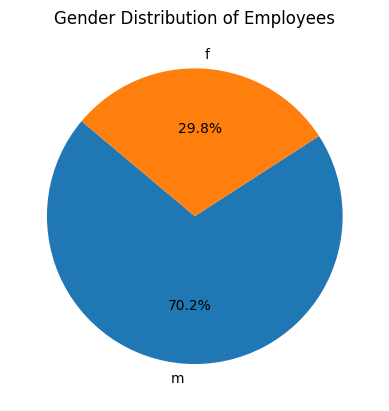

In [ ]:
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Employees')
plt.show()

# **Preprocessing**

In [ ]:
columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']
encode = OrdinalEncoder()
before_encoding = {}
after_encoding = {}
encoded = {}

for column in columns:
  before_encoding[column] = df[column].unique()
  df[column] = encode.fit_transform(df[[column]])
  after_encoding[column] = df[column].unique()
  encoded[column] = {before_encoding[column][i]: after_encoding[column][i] for i in range(len(before_encoding[column]))}

In [ ]:
for column in columns:
    print(f"Encoded values for column '{column}': {encoded[column]}")

Encoded values for column 'department': {'Sales & Marketing': 7.0, 'Operations': 4.0, 'Technology': 8.0, 'Analytics': 0.0, 'R&D': 6.0, 'Procurement': 5.0, 'Finance': 1.0, 'HR': 2.0, 'Legal': 3.0}
Encoded values for column 'region': {'region_7': 31.0, 'region_22': 14.0, 'region_19': 10.0, 'region_23': 15.0, 'region_26': 18.0, 'region_2': 11.0, 'region_20': 12.0, 'region_34': 27.0, 'region_1': 0.0, 'region_4': 28.0, 'region_29': 21.0, 'region_31': 24.0, 'region_15': 6.0, 'region_14': 5.0, 'region_11': 2.0, 'region_5': 29.0, 'region_28': 20.0, 'region_17': 8.0, 'region_13': 4.0, 'region_16': 7.0, 'region_25': 17.0, 'region_10': 1.0, 'region_27': 19.0, 'region_30': 23.0, 'region_12': 3.0, 'region_21': 13.0, 'region_8': 32.0, 'region_32': 25.0, 'region_6': 30.0, 'region_33': 26.0, 'region_24': 16.0, 'region_3': 22.0, 'region_9': 33.0, 'region_18': 9.0}
Encoded values for column 'education': {"Master's & above": 2.0, "Bachelor's": 0.0, 'Not Mentioned': 3.0, 'Below Secondary': 1.0}
Encoded va

# **Machine Learning**

**2 separating independent and dependent**

In [ ]:
x=df.drop("is_promoted",axis=1)
y=df["is_promoted"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

**3 Identifying algorithms/Model:**

In [ ]:
# Classification
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)
print(models)

 38%|███▊      | 11/29 [00:49<01:04,  3.59s/it]

**4 training**

In [ ]:
# DecisionTreeClassifier
model_DT=DecisionTreeClassifier().fit(x_train,y_train)
y_pred_DT=model_DT.predict(x_test)

In [ ]:
# AdaBoostClassifier
model_Ada=AdaBoostClassifier().fit(x_train,y_train)
y_pred_Ada=model_Ada.predict(x_test)

**5 Evaluation**

In [ ]:
# DecisionTreeClassifier
ps = precision_score(y_test, y_pred_DT)
rs = recall_score(y_test, y_pred_DT)

ps, rs

(0.40427154843630814, 0.43159609120521175)

In [ ]:
# AdaBoostClassifier
ps = precision_score(y_test, y_pred_Ada)
rs = recall_score(y_test, y_pred_Ada)
ps, rs

(0.7108433734939759, 0.14413680781758959)

# **Test**

**Loading test dataset**

In [ ]:
file_path = '/content/drive/My Drive/DTM15/Dataset/HR Analytics/train.csv'
df = pd.read_csv(file_path)
test_file_path = '/content/drive/My Drive/DTM15/Dataset/HR Analytics/test.csv'
test_df = pd.read_csv(test_file_path)

**Observing test dataset**

In [ ]:
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.00,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.00,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.00,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.00,7,0,0,61


In [ ]:
test_df.shape

(23490, 13)

In [ ]:
test_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

**Comparing columns in both dataset**

In [ ]:
column_exist = [column for column in df.columns if column in test_df.columns]
column_not_exist_in_test = [column for column in df.columns if column not in test_df.columns]
column_not_exist_in_df = [column for column in test_df.columns if column not in df.columns]
print("Columns exist in both DataFrames:", column_exist)
print("Columns not exist in test_df:", column_not_exist_in_test)
print("Columns not exist in df:", column_not_exist_in_df)

Columns exist in both DataFrames: ['employee_id', 'department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']
Columns not exist in test_df: ['is_promoted']
Columns not exist in df: []


**Comparing elements in categorical columns**

In [ ]:
category_columns = ['department', 'region', 'education', 'gender', 'recruitment_channel',
                    'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'is_promoted']

In [ ]:
column_not_exist = []
elements_not_exist = {}

for column in category_columns:
    if column in test_df.columns:
        elements_not_exist[column] = []
        for element in test_df[column].unique():
            if element not in df[column].unique():
                elements_not_exist[column].append(element)
    else:
        column_not_exist.append(column)

print("Columns not exist in test_df:", column_not_exist)
print("Elements not exist in test_df:", elements_not_exist)



Columns not exist in test_df: ['is_promoted']
Elements not exist in test_df: {'department': [], 'region': [], 'education': [nan], 'gender': [], 'recruitment_channel': [], 'previous_year_rating': [nan], 'KPIs_met >80%': [], 'awards_won?': []}


**Cleaning test dataset**

In [ ]:
test_df.set_index('employee_id', inplace=True)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23490 entries, 8724 to 5973
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            23490 non-null  object 
 1   region                23490 non-null  object 
 2   education             22456 non-null  object 
 3   gender                23490 non-null  object 
 4   recruitment_channel   23490 non-null  object 
 5   no_of_trainings       23490 non-null  int64  
 6   age                   23490 non-null  int64  
 7   previous_year_rating  21678 non-null  float64
 8   length_of_service     23490 non-null  int64  
 9   KPIs_met >80%         23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.3+ MB


In [ ]:
test_df.isnull().sum()

department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [ ]:
test_df.education.fillna("Not Mentioned", inplace = True)
test_df.previous_year_rating.fillna(0, inplace = True)

In [ ]:
test_df.duplicated().sum()

26

In [ ]:
test_df.drop_duplicates(inplace = True)

**Preprocessing test dataset**

In [ ]:
columns = ['department', 'region', 'education', 'gender', 'recruitment_channel']
for column in columns:
  test_df[column] = test_df[column].map(encoded[column])

In [ ]:
test_before_encoding = {}
test_after_encoding = {}
test_encoded = {}
for column in columns:
  test_before_encoding[column] = test_df[column].unique()
  test_df[column] = test_df[column].map(encoded[column])
  test_after_encoding[column] = test_df[column].unique()
  test_encoded[column] = {test_before_encoding[column][i]: test_after_encoding[column][i] for i in range(len(test_before_encoding[column]))}

In [ ]:
for column in columns:
    print(f"Encoded values for column '{column}': {test_encoded[column]}")

Encoded values for column 'department': {'Technology': 8.0, 'HR': 2.0, 'Sales & Marketing': 7.0, 'Procurement': 5.0, 'Finance': 1.0, 'Analytics': 0.0, 'Operations': 4.0, 'Legal': 3.0, 'R&D': 6.0}
Encoded values for column 'region': {'region_26': 18.0, 'region_4': 28.0, 'region_13': 4.0, 'region_2': 11.0, 'region_29': 21.0, 'region_7': 31.0, 'region_22': 14.0, 'region_16': 7.0, 'region_17': 8.0, 'region_24': 16.0, 'region_11': 2.0, 'region_27': 19.0, 'region_9': 33.0, 'region_20': 12.0, 'region_34': 27.0, 'region_23': 15.0, 'region_8': 32.0, 'region_14': 5.0, 'region_31': 24.0, 'region_19': 10.0, 'region_5': 29.0, 'region_28': 20.0, 'region_15': 6.0, 'region_3': 22.0, 'region_25': 17.0, 'region_12': 3.0, 'region_21': 13.0, 'region_30': 23.0, 'region_10': 1.0, 'region_33': 26.0, 'region_32': 25.0, 'region_6': 30.0, 'region_1': 0.0, 'region_18': 9.0}
Encoded values for column 'education': {"Bachelor's": 0.0, "Master's & above": 2.0, 'Not Mentioned': 3.0, 'Below Secondary': 1.0}
Encoded va

In [ ]:
encoded['department']

{'Sales & Marketing': 7.0,
 'Operations': 4.0,
 'Technology': 8.0,
 'Analytics': 0.0,
 'R&D': 6.0,
 'Procurement': 5.0,
 'Finance': 1.0,
 'HR': 2.0,
 'Legal': 3.0}

**Predicting the promotion**

In [ ]:
prediction = model_Ada.predict(test_df)

In [ ]:
test_df.drop('predicted promotion', axis = 1, inplace = True)

In [ ]:
test_df['predicted promotion'] = prediction

In [ ]:
test_df['predicted promotion'].value_counts()

predicted promotion
0    23038
1      426
Name: count, dtype: int64

In [ ]:
test_df

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,predicted promotion
employee_id,,,,,,,,,,,,,
8724,8.00,18.00,0.00,1.00,2.00,1,24,0.00,1,1,0,77,0
74430,2.00,28.00,0.00,0.00,0.00,1,31,3.00,5,0,0,51,0
72255,7.00,4.00,0.00,1.00,0.00,1,31,1.00,4,0,0,47,0
38562,5.00,11.00,0.00,0.00,0.00,3,31,2.00,9,0,0,65,0
64486,1.00,21.00,0.00,1.00,2.00,1,30,4.00,7,0,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53478,3.00,11.00,1.00,1.00,2.00,1,24,3.00,1,0,0,61,0
25600,8.00,17.00,0.00,1.00,2.00,1,31,3.00,7,0,0,74,0
45409,2.00,7.00,0.00,0.00,2.00,1,26,4.00,4,0,0,50,0
